In [9]:
%load_ext autoreload
%autoreload 2

from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="darkgrid", context="notebook", font_scale=1.1)
pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
path_prep = "../../src/txt_comments/jigsaw_data_prep.parquet"
path_raw = "../../src/txt_comments/jigsaw_data.zip"
use_cols = [
    "comment_text",
    "toxicity",
    "split",
    "created_date",
    "toxicity_annotator_count",
]
comments_prep = pd.read_parquet(path_prep)
comments_raw = pd.read_csv(path_raw, dtype=str, usecols=use_cols)
print("Comentarios de ejemplos contenidos en el Dataset:")
pprint(comments_raw["comment_text"].sample(3).values)
comments_raw.head(2)

Comentarios de ejemplos contenidos en el Dataset:
array(["My condolences to Erin's family and friends, she sounded like an amazing woman. As a former Alaska field geologist I so far have been fortunate in my bear encounters. Sometimes I was armed and sometimes not. I believe your brain is your best weapon against bears, guns can create complacancy. But it it is always possible to be in the wrong place at the wrong time. Bears are unbelievably strong and fast. The vast majority of bear attacks are defensive, although I always heard most predatory attacks were by Black Bears. The remote possibility of a predatory attack is perhaps the best reason to carry a firearm if you are properly trained.",
       'Is se not the one whom the ANCYL is threatening with disciplinary action...?',
       'Absolutely they will be better.  I see the difference every day - a 20 to 30 year old in an office environment versus the many computer-illiterate 50+ year olds.  That\'s not to say the computer-illiter

,comment_text,split,created_date,toxicity,toxicity_annotator_count
0,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,0.373134328358209,67
1,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,0.6052631578947368,76


In [3]:
missing = comments_raw["comment_text"].isna().sum()
print(f"Comentarios faltantes: {missing}")

print("\nComentarios mas frecuentes longitud menor a 5 caracteres:")
comments_prep.query("len_text <= 5")["comment_text"].value_counts().head(8)

Comentarios faltantes: 4

Comentarios mas frecuentes longitud menor a 5 caracteres:


comment_text
What?    93
Amen.    90
Good.    85
Amen!    82
Nope.    81
Yawn.    48
Good!    40
scary    37
Name: count, dtype: int64

Descripcion de la caracteristica de toxicidad en el dataset:
count    1.995916e+06
mean     1.030683e-01
std      1.971440e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.666667e-01
max      1.000000e+00
Name: toxicity, dtype: float64


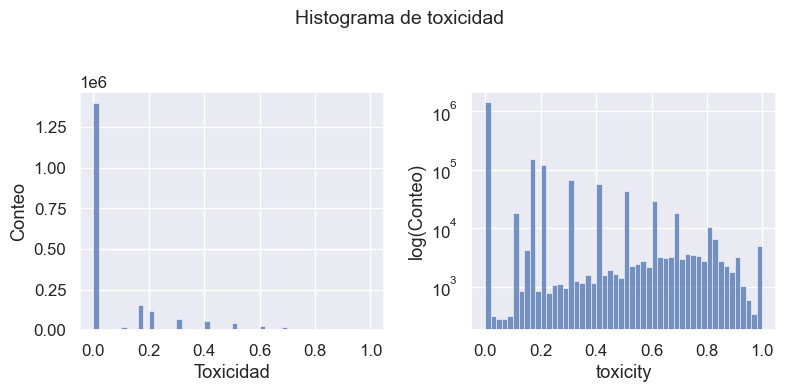

In [13]:
print("Descripcion de la caracteristica de toxicidad en el dataset:")
toxicity_data = comments_raw["toxicity"]
print(toxicity_data.describe())

fig, (ax1, ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(8, 4),
    sharex=True,
)
fig.suptitle("Histograma de toxicidad", fontsize=14)

sns.histplot(toxicity_data, bins=50, ax=ax1)
ax1.set_xlabel("Toxicidad")
ax1.set_ylabel("Conteo")
ax1.tick_params(bottom=False, left=False)

sns.histplot(toxicity_data, bins=50, ax=ax2)
ax1.set_xlabel("Toxicidad")
ax2.set_ylabel("log(Conteo)")
ax2.set_yscale("log")
ax2.tick_params(bottom=False, left=False)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the main title
plt.show()

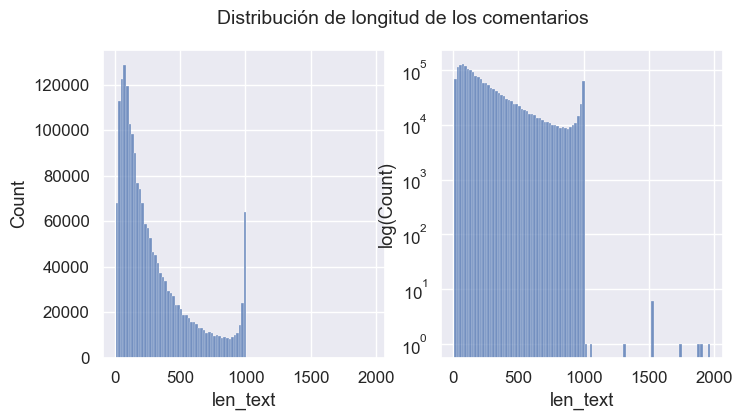

In [ ]:
print(comments_prep["len_text"].describe())
fig, (ax1, ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(8, 4),
)
fig.suptitle("Distribución de longitud de los comentarios", fontsize=14)

sns.histplot(comments_prep["len_text"], bins=100, ax=ax1)
ax1.set_ylabel("Count")

sns.histplot(comments_prep["len_text"], bins=100, ax=ax2)
ax2.set_ylabel("log(Count)")
ax2.set_yscale("log")

plt.show()

In [ ]:
# comentarios mas largo de lo comun
comments_prep.query("len_text >= 1.1e3")["comment_text"].values

array(["I'm not a big fan of either, but I've seen both, if you can count the first three Star Wars movies and a random smattering of different Star Trek episodes as having seen them. \n\nOf course you have an apples and oranges problem in making the comparison, because the scope of the two projects – objectives, budgets, people involved, and all things creative – were so different. Trek was conceived to sell ads on network TV, right? Wars was a Lucas/Spielburg extravaganza. Sure, Trek became a series of movies too, but that was afterthought. So it bothers me that you cite history based on the movies with Star Wars first, when Star Trek actually started almost two decades earlier than Star Wars, in 1966, as a television show. \n\nProduction values, star power, effects, of course all go to Star Wars, and there is budget and objectives behind that. But Star Trek did start earlier, paved the way, and had a long history of different people involved, with an interesting flair for putting re

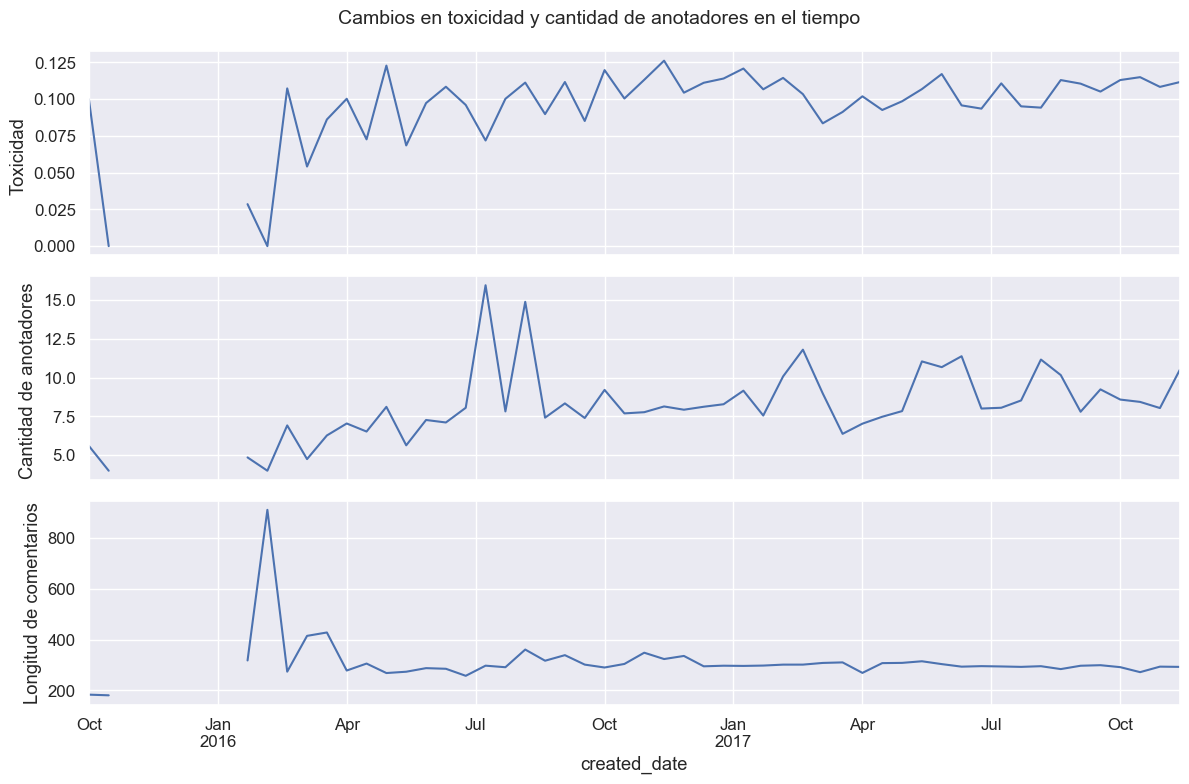

In [52]:
sampled = comments_prep.sample(20_000, random_state=42)
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3,
    ncols=1,
    figsize=(12, 8),
    sharex=True,
)
fig.suptitle("Cambios en toxicidad y cantidad de anotadores en el tiempo", fontsize=14)
sampled.groupby(pd.Grouper(key="created_date", freq="2W")).agg(
    {"toxicity": "mean"}
).plot(ax=ax1)
ax1.set_ylabel("Toxicidad ")
ax1.get_legend().remove()

sampled.groupby(pd.Grouper(key="created_date", freq="2W")).agg(
    {"toxicity_annotator_count": "mean"}
).plot(ax=ax2)
ax2.set_ylabel("Cantidad de anotadores ")
ax2.get_legend().remove()

sampled.groupby(pd.Grouper(key="created_date", freq="2W")).agg(
    {"len_text": "mean"}
).plot(ax=ax3)
ax3.set_ylabel("Longitud de comentarios")
ax3.get_legend().remove()

plt.tight_layout()
plt.show()

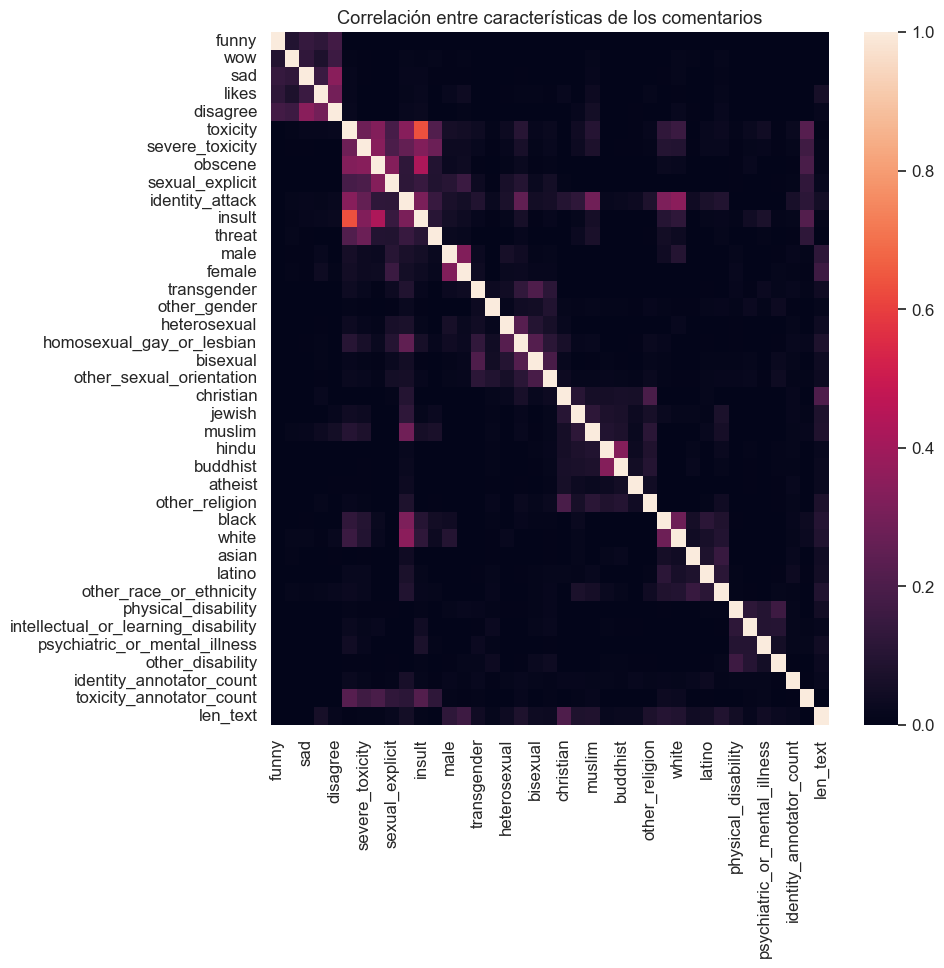

In [71]:
# plot correlation matrix
corr = comments_prep.iloc[:, 8:].corr()
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr, annot=False, fmt=".2f", ax=ax, vmin=0, vmax=1)
plt.title("Correlación entre características de los comentarios")
plt.show()

## Word distribution and Wordcloud exploration

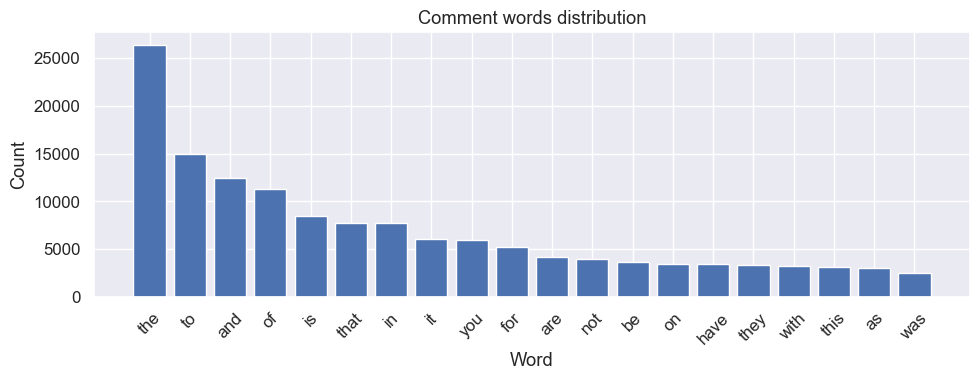

In [ ]:
from bow import get_bow, plot_wordcloud, plot_word_distribution

doc_array, model = get_bow(comments_prep["comment_text"].sample(10_000))
plot_word_distribution(doc_array, model, "Comment words distribution")

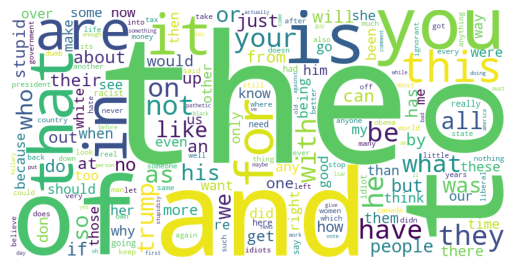

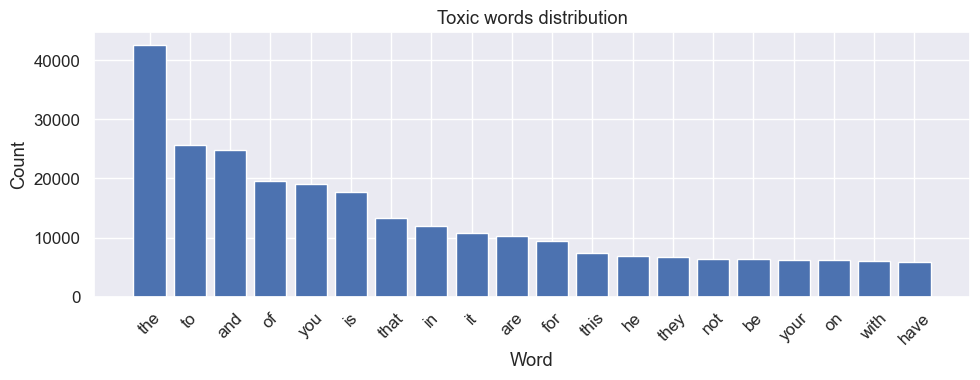

In [86]:
bow(comments_prep.query("toxicity > 0.7")["comment_text"])
plot_wordcloud(doc_array, model)
plot_word_distribution(doc_array, model, "Toxic words distribution")

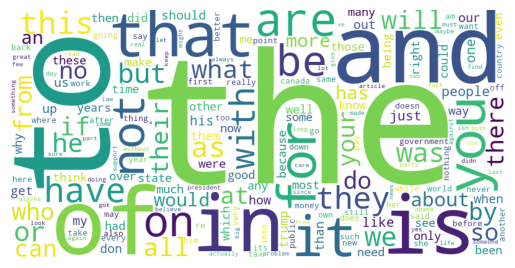

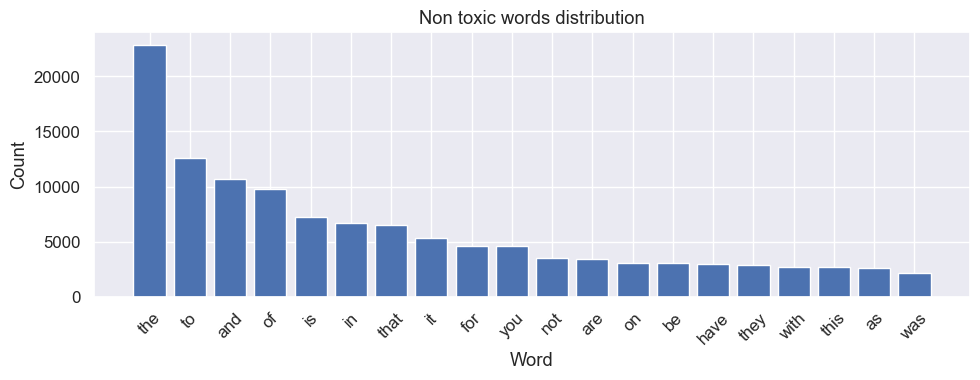

In [83]:
doc_array, model = get_bow(comments_prep.sample(10_000).query("toxicity < 0.2")["comment_text"])
plot_wordcloud(doc_array, model)
plot_word_distribution(doc_array, model, "Non toxic words distribution")